In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import scipy.stats as stats
from scipy.stats import f, norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('user_study_n_16.csv')
data = data.drop([0, 1], axis=0)
data = data.reset_index()
data.head()

index      StartDate        EndDate Status       IPAddress Progress  \
0      2  8/29/19 11:33  8/29/19 11:59      0  168.150.46.166      100   
1      3  8/29/19 13:02  8/29/19 13:28      0  168.150.46.166      100   
2      4  8/29/19 14:03  8/29/19 14:18      0  168.150.46.166      100   
3      5  8/29/19 15:21  8/29/19 15:52      0  168.150.46.166      100   
4      6  8/29/19 16:05  8/29/19 17:05      0  168.150.46.166      100   

  Duration (in seconds) Finished   RecordedDate         ResponseId  ...  \
0                  1540        1  8/29/19 11:59  R_3n6gq0d5n5Goksv  ...   
1                  1565        1  8/29/19 13:28  R_2zA9DlNfqv7t68E  ...   
2                   937        1  8/29/19 14:18  R_1LUyHS6EtItMCh1  ...   
3                  1859        1  8/29/19 15:52  R_3Ej18AZR4iBazjD  ...   
4                  3590        1  8/29/19 17:05  R_3DokOSJqATe63vv  ...   

  e_c_loc_1_y e_c_conf_1 f_sm_phys_1 f_sm_loc_1_x f_sm_loc_1_y f_sm_conf_1  \
0         512          4           5          753          517           4   
1         485          5           3          756          295           5   
2          88          3           5           26           42           3   
3         485          4           5          405          281           4   
4         486          5           6          756          515           4   

  g_od_phys_1 g_od_loc_1_x g_od_loc_1_y g_od_conf_1  
0           5          233          160           4  
1           7          888          270           5  
2           5          874          263           2  
3           4          885          256           3  
4           7          442          298           5  

[5 rows x 144 columns]

In [3]:
for col in data.columns:
    print(col)

index
StartDate
EndDate
Status
IPAddress
Progress
Duration (in seconds)
Finished
RecordedDate
ResponseId
RecipientLastName
RecipientFirstName
RecipientEmail
ExternalReference
LocationLatitude
LocationLongitude
DistributionChannel
UserLanguage
txt_baseline_vu_1
txt_baseline_vu_conf_1
txt_baseline_usg_1
txt_baseline_usg_con_1
txt_baseline_u_1
txt_baseline_u_conf_1
b_b_phys_1
b_b_loc_1_x
b_b_loc_1_y
b_b_conf_1
c_b_phys_1
c_b_loc_1_x
c_b_loc_1_y
c_b_conf_1
e_b_phys_1
e_b_loc_1_x
e_b_loc_1_y
e_b_conf_1
f_b_phys_1
f_b_loc_1_x
f_b_loc_1_y
f_b_conf_1
g_b_phys_1
g_b_loc_1_x
g_b_loc_1_y
g_b_conf_1
b_bp_phys_1
b_bp_loc_1_x
b_bp_loc_1_y
b_bp_conf_1
c_c_phys_1
c_c_loc_1_x
c_c_loc_1_y
c_c_conf_1
e_sm_phys_1
e_sm_loc_1_x
e_sm_loc_1_y
e_sm_conf_1
f_od_phys_1
f_od_loc_1_x
f_od_loc_1_y
f_od_conf_1
g_sd_phys_1
g_sd_loc_1_x
g_sd_loc_1_y
g_sd_conf_1
b_c_phys_1
b_c_loc_1_x
b_c_loc_1_y
b_c_conf_1
c_sm_phys_1
c_sm_loc_1_x
c_sm_loc_1_y
c_sm_conf_1
e_od_phys_1
e_od_loc_1_x
e_od_loc_1_y
e_od_conf_1
f_sd_phys_1
f

In [4]:
phys_data = pd.melt(data, id_vars=['index'], value_vars=['b_b_phys_1', 'b_bp_phys_1', 'b_c_phys_1', 'b_sm_phys_1', 'b_od_phys_1', 'b_sd_phys_1',
                                                            'c_b_phys_1', 'c_bp_phys_1', 'c_c_phys_1', 'c_sm_phys_1', 'c_od_phys_1', 'c_sd_phys_1',
                                                            'e_b_phys_1', 'e_bp_phys_1', 'e_c_phys_1', 'e_sm_phys_1', 'e_od_phys_1', 'e_sd_phys_1',
                                                            'f_b_phys_1', 'f_bp_phys_1', 'f_c_phys_1', 'f_sm_phys_1', 'f_od_phys_1', 'f_sd_phys_1',
                                                            'g_b_phys_1', 'g_bp_phys_1', 'g_c_phys_1', 'g_sm_phys_1', 'g_od_phys_1', 'g_sd_phys_1'])

#phys_data = pd.melt(data, id_vars=['index'], value_vars=['b_b_phys_1', 'b_sm_phys_1', 'b_od_phys_1', 'b_sd_phys_1',
#                                                         'c_b_phys_1', 'c_sm_phys_1', 'c_od_phys_1', 'c_sd_phys_1',
#                                                         'e_b_phys_1', 'e_sm_phys_1', 'e_od_phys_1', 'e_sd_phys_1',
#                                                         'f_b_phys_1', 'f_sm_phys_1', 'f_od_phys_1', 'f_sd_phys_1',
#                                                         'g_b_phys_1', 'g_sm_phys_1', 'g_od_phys_1', 'g_sd_phys_1'])

print(phys_data.head())
phys_data = phys_data.astype({'value': 'float'})

   index    variable value
0      2  b_b_phys_1     3
1      3  b_b_phys_1     3
2      4  b_b_phys_1     5
3      5  b_b_phys_1     3
4      6  b_b_phys_1     5


In [5]:
# add columns: 'view' and 'scenario'
# then we can treat each view * scenario separately, and also aggregate across each of them

def column_to_view(name):
    # b --> interp_only
    if name[2:4] == 'b_':
        return 'interp_only'
    # bp --> interp_and_sensors
    elif name[2:4] == 'bp':
        return 'interp_and_sensors'
    # c --> contours
    elif name[2:4] == 'c_':
        return 'contours'
    # sm --> small_multiples
    elif name[2:4] == 'sm':
        return 'small_multiples'
    # od --> ordered_dotmap
    elif name[2:4] == 'od':
        return 'ordered_dotmap'
    # sd --> smooth_dotmap
    elif name[2:4] == 'sd':
        return 'smooth_dotmap'
    else:
        print('error! view abbreviation not recognized: ', name[2:3])

In [6]:
phys_data['view'] = phys_data.apply(lambda row: column_to_view(row.variable), axis=1)

In [7]:
phys_data['scenario'] = phys_data.apply(lambda row: row.variable[0], axis=1)

In [8]:
phys_data.head()

index    variable  value         view scenario
0      2  b_b_phys_1    3.0  interp_only        b
1      3  b_b_phys_1    3.0  interp_only        b
2      4  b_b_phys_1    5.0  interp_only        b
3      5  b_b_phys_1    3.0  interp_only        b
4      6  b_b_phys_1    5.0  interp_only        b

In [9]:
phys_data.groupby('view').mean()

index   value
view                             
contours              9.5  5.6250
interp_and_sensors    9.5  4.9000
interp_only           9.5  4.7750
ordered_dotmap        9.5  5.3125
small_multiples       9.5  5.3000
smooth_dotmap         9.5  5.5750

[0, 1, 2, 3, 4, 5, 6, 7, 8]


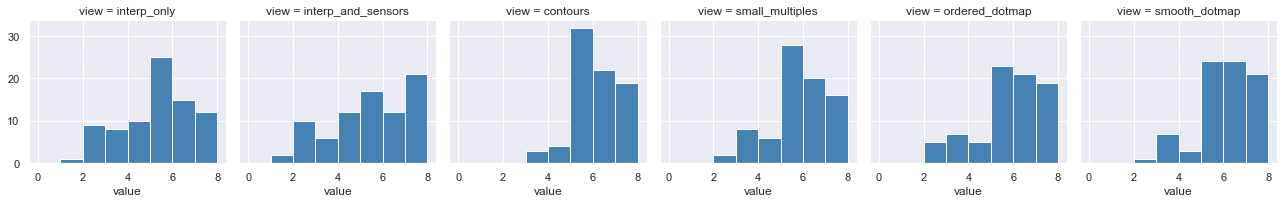

In [10]:
# let's check assumptions to make sure it's ok to use repeated measures ANOVA...
# 1. normality:
# for each 'level' of the within-subjects factor (for each view; for each scenario), the dependent variable (value) should be normal

#view:
sns.set(style='darkgrid')
bins=[0, 1, 2, 3, 4, 5, 6, 7, 8]
print(bins)
g = sns.FacetGrid(phys_data, col='view', margin_titles=True)
g.map(plt.hist, 'value', color='steelblue', bins=bins)

# these are somewhat non-normal. On one hand, ANOVA is known to be relatively robust to non-normality
# (i.e., https://transparentstats.github.io/guidelines/principles.html)
# on the other hand, this reflects on an improvement we could make --
# for future studies, would need more ambiguous situations so people aren't 
# choosing the most extreme response as often.

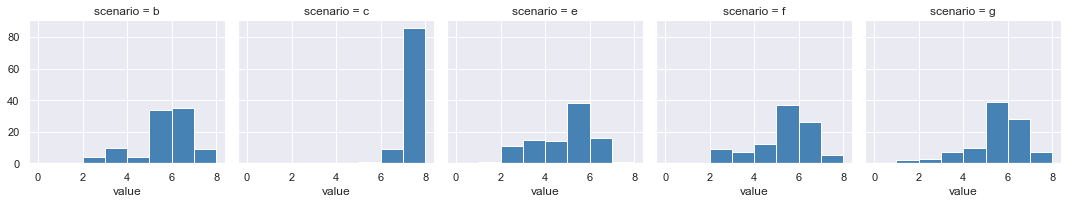

In [11]:
#scenario:
sns.set(style='darkgrid')
g = sns.FacetGrid(phys_data, col='scenario', margin_titles=True)
g.map(plt.hist, 'value', color='steelblue', bins=bins)

# --> ok, maybe throw out scenario c

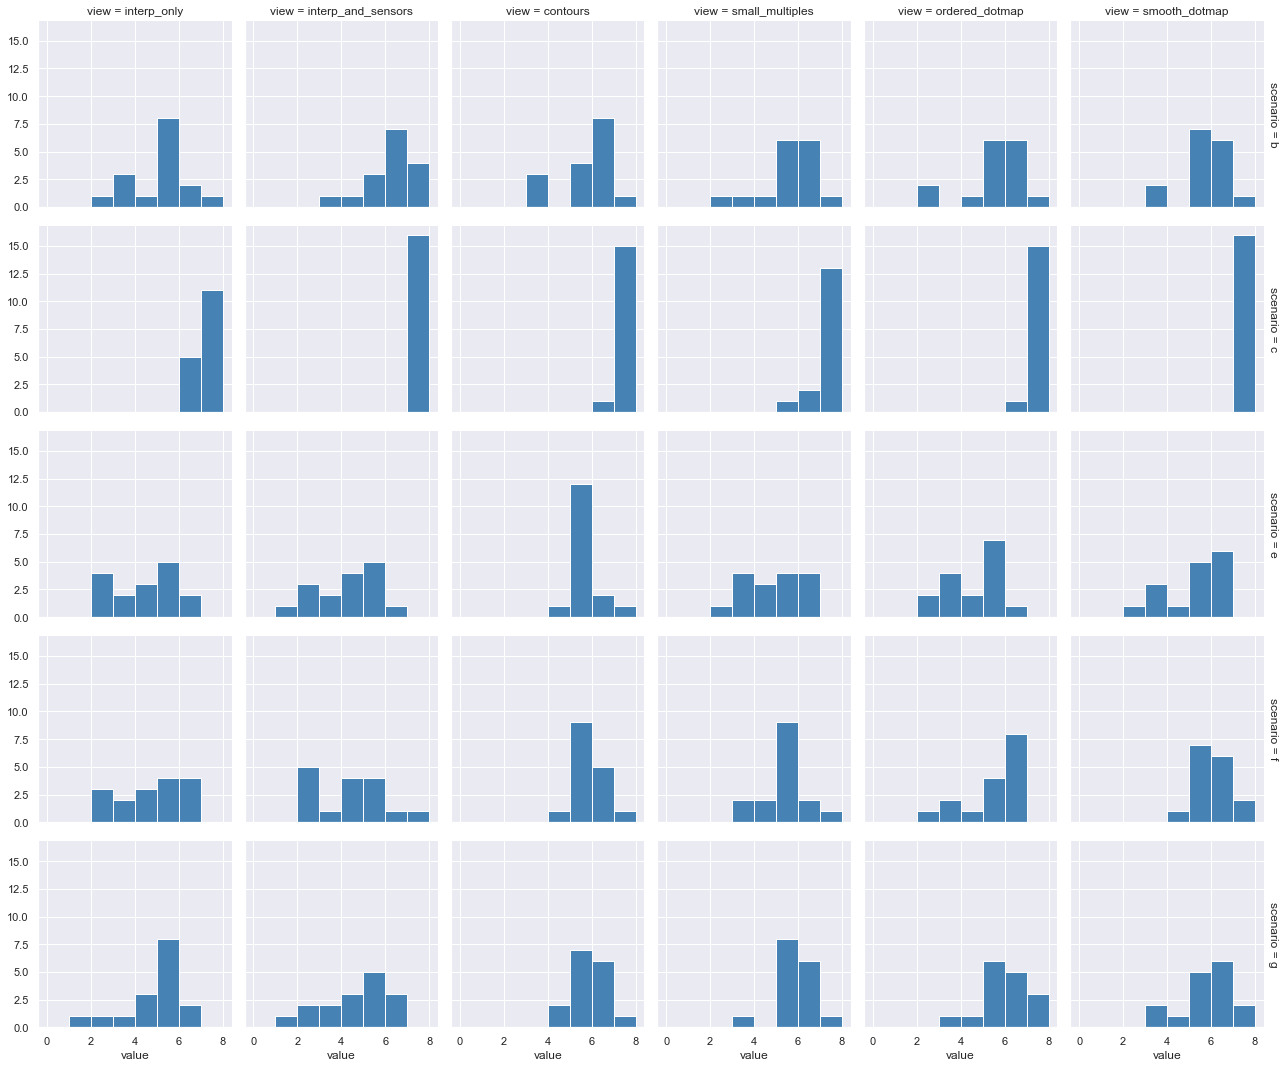

In [12]:
# let's look at everything together...
g = sns.FacetGrid(phys_data, row='scenario', col='view', margin_titles=True)
g.map(plt.hist, 'value', color='steelblue', bins=bins)

In [13]:
# let's get rid of scenario C -- hate to throw out data, but it's too unlike the others to inspire confidence
phys_data = phys_data[phys_data.scenario != 'c']

In [14]:
# 2. sphericity -- fails :(
stats.levene(np.array(phys_data[phys_data['view'] == 'interp_only']['value'],dtype=float),
               np.array(phys_data[phys_data['view'] == 'interp_and_sensors']['value'],dtype=float),
               np.array(phys_data[phys_data['view'] == 'contours']['value'],dtype=float),
               np.array(phys_data[phys_data['view'] == 'small_multiples']['value'],dtype=float),
               np.array(phys_data[phys_data['view'] == 'ordered_dotmap']['value'],dtype=float),
               np.array(phys_data[phys_data['view'] == 'smooth_dotmap']['value'],dtype=float))

LeveneResult(statistic=4.386099044309296, pvalue=0.0006799491209642729)

In [15]:
aovrm = AnovaRM(phys_data, 'value', 'index', within=['view', 'scenario'])
res = aovrm.fit()

print(res)

                    Anova
              F Value  Num DF  Den DF  Pr > F
---------------------------------------------
view           7.7965  5.0000  75.0000 0.0000
scenario      11.3681  3.0000  45.0000 0.0000
view:scenario  3.5928 15.0000 225.0000 0.0000



In [192]:
# the view has a significant impact on people's risk perception, according to the ANOVA
# nevertheless, we're a bit skeptical because sphericity may be violated
# ( --> apply the relevant correction using a different library that supports it!)

phys_data.groupby('view').mean()

index     value
view                               
contours              9.5  5.296875
interp_and_sensors    9.5  4.375000
interp_only           9.5  4.296875
ordered_dotmap        9.5  4.906250
small_multiples       9.5  4.937500
smooth_dotmap         9.5  5.218750

In [193]:
# let's also try a mixed models approach -- more robust than the anova, perhaps. 
# at least another quantitative data point
md = smf.mixedlm('value', data=phys_data, groups=[''])
mdf = md.fit()
print(mdf.summary())

In [194]:
conf_data = pd.melt(data, id_vars=['index'], value_vars=['b_b_conf_1', 'b_bp_conf_1', 'b_c_conf_1', 'b_sm_conf_1', 'b_od_conf_1', 'b_sd_conf_1',
                                                            'c_b_conf_1', 'c_bp_conf_1', 'c_c_conf_1', 'c_sm_conf_1', 'c_od_conf_1', 'c_sd_conf_1',
                                                            'e_b_conf_1', 'e_bp_conf_1', 'e_c_conf_1', 'e_sm_conf_1', 'e_od_conf_1', 'e_sd_conf_1',
                                                            'f_b_conf_1', 'f_bp_conf_1', 'f_c_conf_1', 'f_sm_conf_1', 'f_od_conf_1', 'f_sd_conf_1',
                                                            'g_b_conf_1', 'g_bp_conf_1', 'g_c_conf_1', 'g_sm_conf_1', 'g_od_conf_1', 'g_sd_conf_1'])

#conf_data = pd.melt(data, id_vars=['index'], value_vars=['c_b_conf_1', 'c_bp_conf_1', 'c_c_conf_1', 'c_sm_conf_1', 'c_od_conf_1', 'c_sd_conf_1',
#                                                            'e_b_conf_1', 'e_bp_conf_1', 'e_c_conf_1', 'e_sm_conf_1', 'e_od_conf_1', 'e_sd_conf_1',
#                                                            'f_b_conf_1', 'f_bp_conf_1', 'f_c_conf_1', 'f_sm_conf_1', 'f_od_conf_1', 'f_sd_conf_1',
#                                                            'g_b_conf_1', 'g_bp_conf_1', 'g_c_conf_1', 'g_sm_conf_1', 'g_od_conf_1', 'g_sd_conf_1'])
conf_data = conf_data.astype({'value': 'float'})
conf_data = conf_data[conf_data['index'] != 10]

In [195]:
conf_data['view'] = conf_data.apply(lambda row: column_to_view(row.variable), axis=1)
conf_data['scenario'] = conf_data.apply(lambda row: row.variable[0], axis=1)
# get rid of a sneaky NAN! to keep things balanced, need to remove all entries for this user :(
# ^^ index 10
conf_data = conf_data.reset_index(drop=True)

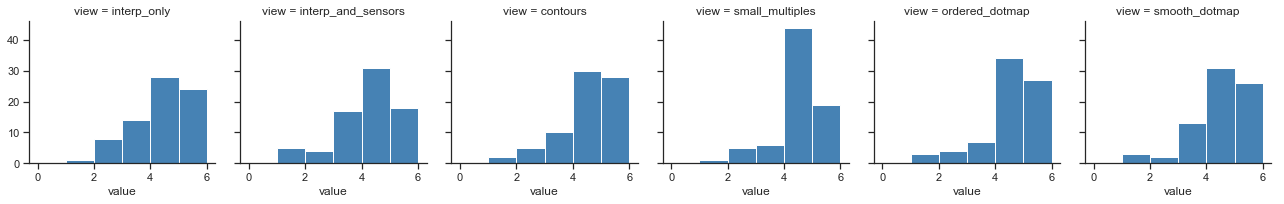

In [196]:
# checking NORMALITY for confidence data:
# by view:
bins=[0, 1, 2, 3, 4, 5, 6]
g = sns.FacetGrid(conf_data, col='view', margin_titles=True)
g.map(plt.hist, 'value', color='steelblue', bins=bins)

# ehhh

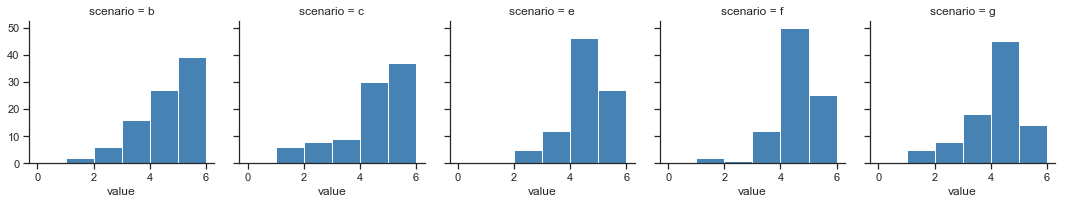

In [197]:
# by scenario:
g = sns.FacetGrid(conf_data, col='scenario', margin_titles=True)
g.map(plt.hist, 'value', color='steelblue', bins=bins)

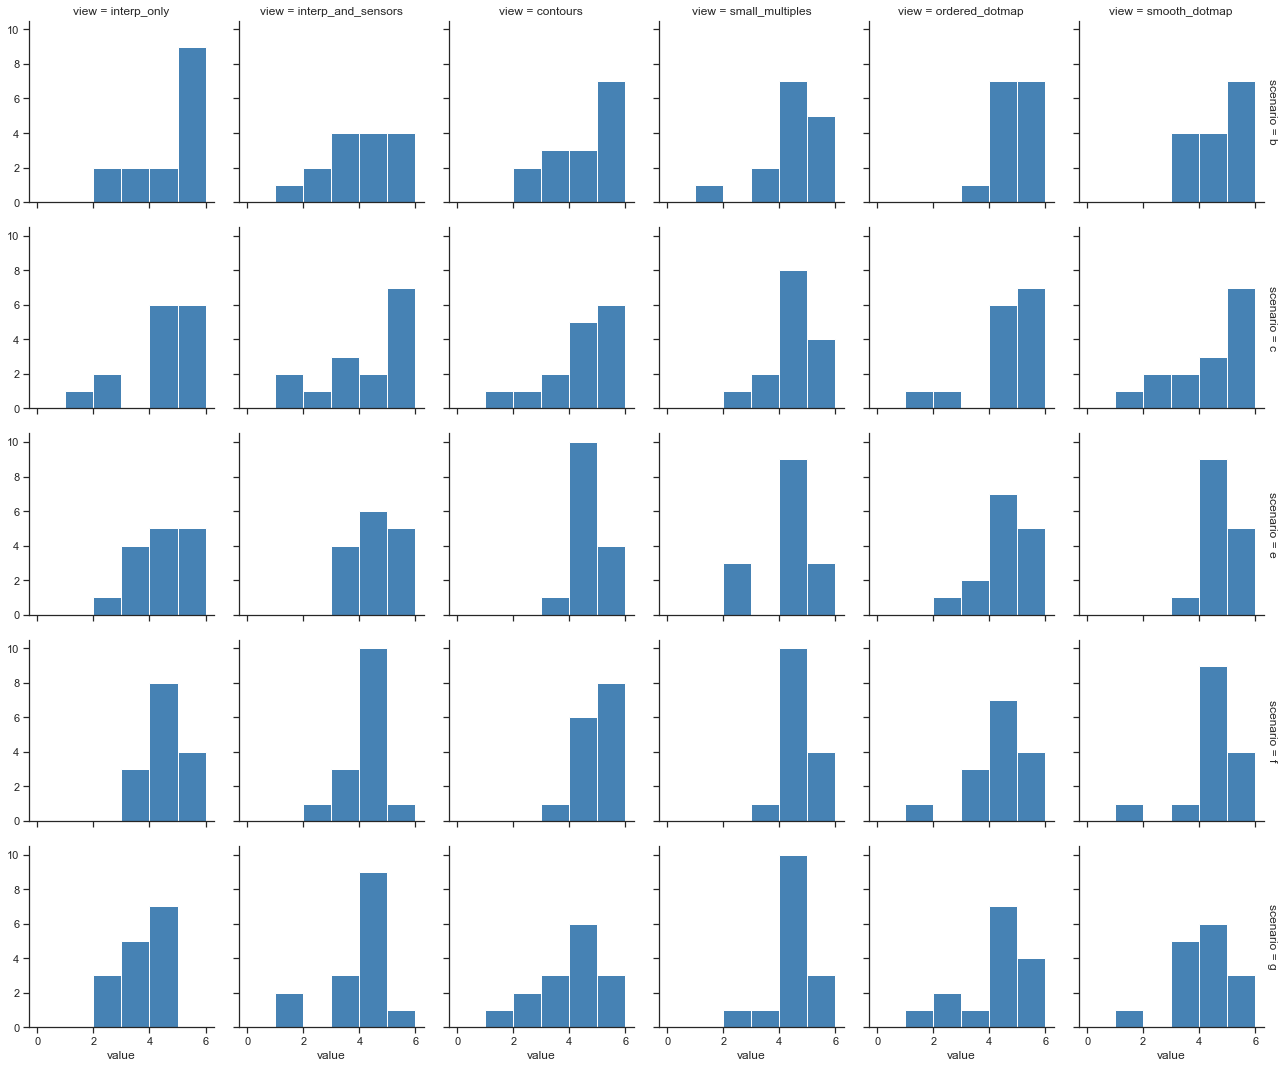

In [198]:
# by both:
bins=[0, 1, 2, 3, 4, 5, 6]
g = sns.FacetGrid(conf_data, col='view', row='scenario', margin_titles=True)
g.map(plt.hist, 'value', color='steelblue', bins=bins)

In [199]:
conf_aovrm = AnovaRM(conf_data, 'value', 'index', within=['view', 'scenario'])
res = conf_aovrm.fit()

print(res)

# confidence question not p significant...
# the scenario itself has a bigger impact on whether people feel confident
# caveat: had to throw out data for one user due to an unanswered question

                    Anova
              F Value  Num DF  Den DF  Pr > F
---------------------------------------------
view           1.1846  5.0000  70.0000 0.3256
scenario       2.9497  4.0000  56.0000 0.0278
view:scenario  1.1877 20.0000 280.0000 0.2638



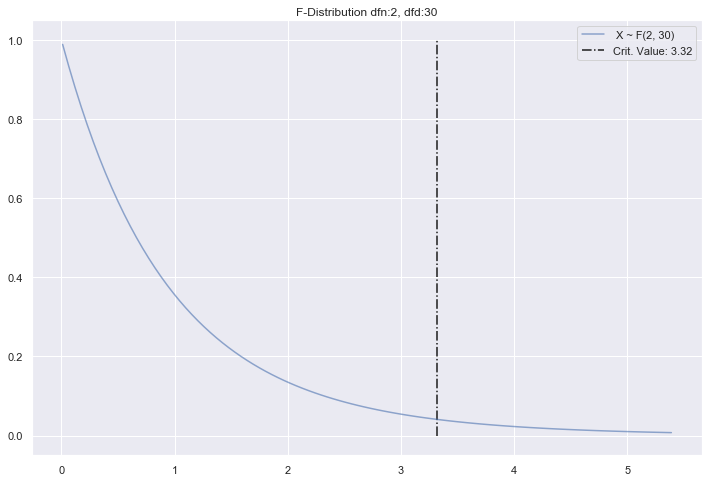

In [154]:
def plot_f_distribution():
    # Set figure 
    plt.figure(figsize=(12, 8))
    
    # Set degrees of freedom
    dfn, dfd = 2, 30
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
    
plot_f_distribution()